### 1st Step: Importing Required Libraries as required.

In [3]:
import numpy as np #It is fast, relatively uses less memory to store data. Mathematical functions to operate on arrays.
import pandas as pd #Data Processing, Importing CSV Files
from pandas_profiling import ProfileReport #Built in EDA
# Pythons uses Pyplot, a submodule of the Matplotlib library to visualize the diagram on the screen.
# Matplotlib is a low level graph plotting library in python
import matplotlib.pyplot as plt
import os # accessing directory structure

### 2nd Step: Changing default directory to desired one.

In [4]:
os.chdir("C:/Users/Himanshu Gulati/Desktop/name")
print(os.getcwd())

C:\Users\Himanshu Gulati\Desktop\name


### 3rd Step:  Analyzing DataFrames.

In [5]:
# Reading csv files
df_sb=pd.read_csv(r"jup_an.csv")
df_ncd=pd.read_csv(r"num_course_done.csv")
df_sncd=pd.read_csv(r"specific_num_course_done.csv")
df_ncgmb=pd.read_csv(r"num_of_course_given_month_basis.csv")
df_nmset=pd.read_csv(r"num_min_spent_each_trainees.csv")
df_att=pd.read_csv(r"att.csv")

In [6]:
df_sb

,learningActivityTitle,duration,learnerCom,learnerCNUM,learnerIntranetID
0,Working with Data for Effective Decision Making,23,12/3/2020,002596REG,simransanjay974@gmail.com
1,Personal Skills for Effective Business Analysis,40,12/3/2020,002596REG,simransanjay974@gmail.com
2,Business Analysis Overview,43,12/3/2020,002596REG,simransanjay974@gmail.com
3,Using Active Listening in Workplace Situations,24,5/24/2020,002596REG,simransanjay974@gmail.com
4,Clarity and Conciseness in Business Writing,21,5/24/2020,002596REG,simransanjay974@gmail.com
...,...,...,...,...,...
795,Framing Opportunities for Effective Data-drive...,24,12/30/2020,002767REG,sagarsharma6970@gmail.com
796,Data Preprocessing,26,12/30/2020,002767REG,sagarsharma6970@gmail.com
797,Framing Opportunities for Effective Data-drive...,24,12/29/2020,002822REG,shwetay629@gmail.com
798,Data Preprocessing,26,12/29/2020,002822REG,shwetay629@gmail.com


In [7]:
# To get full summary of data set
df_sb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   learningActivityTitle  800 non-null    object
 1   duration               800 non-null    int64 
 2   learnerCom             800 non-null    object
 3   learnerCNUM            800 non-null    object
 4   learnerIntranetID      800 non-null    object
dtypes: int64(1), object(4)
memory usage: 31.4+ KB


In [8]:
# It gives statistical summary of data frame.
df_sb.describe()

,duration
count,800.000000
mean,51.298750
std,104.376602
min,0.000000
25%,15.000000
50%,36.000000
75%,69.000000
max,1800.000000


### 4th Step: Data Cleaning Process.

In [9]:
#Counting number of missing or null values
df_sb.isnull().sum()


learningActivityTitle    0
duration                 0
learnerCom               0
learnerCNUM              0
learnerIntranetID        0
dtype: int64

In [10]:
# No Null Value found
# Shape shows the number of element in each dimension 
df_sb.shape
# Here it shows 800 Rows, 5 Columns

(800, 5)

In [11]:
# Droping unnecessary Columns
df_sb.drop(['learnerCNUM'], axis=1, inplace=True)
df_sb

,learningActivityTitle,duration,learnerCom,learnerIntranetID
0,Working with Data for Effective Decision Making,23,12/3/2020,simransanjay974@gmail.com
1,Personal Skills for Effective Business Analysis,40,12/3/2020,simransanjay974@gmail.com
2,Business Analysis Overview,43,12/3/2020,simransanjay974@gmail.com
3,Using Active Listening in Workplace Situations,24,5/24/2020,simransanjay974@gmail.com
4,Clarity and Conciseness in Business Writing,21,5/24/2020,simransanjay974@gmail.com
...,...,...,...,...
795,Framing Opportunities for Effective Data-drive...,24,12/30/2020,sagarsharma6970@gmail.com
796,Data Preprocessing,26,12/30/2020,sagarsharma6970@gmail.com
797,Framing Opportunities for Effective Data-drive...,24,12/29/2020,shwetay629@gmail.com
798,Data Preprocessing,26,12/29/2020,shwetay629@gmail.com


In [12]:
# Shape shows the number of element in each dimension 
df_sb.shape
# Here it shows 800 Rows, 5 Columns

(800, 4)

In [13]:
# Error
# df_sb['learnerCom']=pd.to_datetime(df_sb['learnerCom'])
# print(df_sb.to_string())

In [14]:
# To find Duplicate Values
print(df_sb.duplicated())
# It shows false its means no duplicate value, but given data set has 800 rows & I can see result of top & last only.
# Using Another method

0      False
1      False
2      False
3      False
4      False
       ...  
795    False
796    False
797    False
798    False
799    False
Length: 800, dtype: bool


In [15]:
# It will remove all duplicates
df_sb.drop_duplicates(inplace = True)

In [16]:
df_sb.shape
# There is no change in dimension, it means no duplicates entry in data set.

(800, 4)

### 5th Step: Data Analysis Process.

In [17]:
# It is used to claculate relationship between each column in our data set.
df_sb.corr()
# But it does'nt seem any benefit because we have only 1 column 'duration' has only int data type & rest others are object datatype.

,duration
duration,1.0


#### Total Number of course given by Skills Build

In [18]:
nocsb=len(pd.unique(df_sb['learningActivityTitle']))
print("Total Number of Courses given by Skills Build:", nocsb)

Total Number of Courses given by Skills Build: 184


#### Filtering unique value of 'learningActivityTitle'

In [19]:
nocsbb=pd.unique(df_sb['learningActivityTitle'])
print(nocsbb)

['Working with Data for Effective Decision Making'
 'Personal Skills for Effective Business Analysis'
 'Business Analysis Overview'
 'Using Active Listening in Workplace Situations'
 'Clarity and Conciseness in Business Writing'
 'Audience and Purpose in Business Writing' 'Effective Team Communication'
 'Communicating with impact' 'Learning LinkedIn'
 'How To Use LinkedIn For Beginners - 7 LinkedIn Profile Tips'
 '10 Steps to Getting a LinkedIn Profile That Rocks!'
 'CompTIA A+ 220-1001: Laptops Features & Mobile Device Types'
 'Prepare your talk' 'Professional Skills: Present with Purpose'
 'Making an Impact with Non-verbal Communication'
 'CompTIA A+ 220-1001: Networking Tools' 'CompTIA A+ 220-1001: Connectors'
 'CompTIA A+ 220-1001: Networking'
 'CompTIA A+ 220-1001: Implementing Network Concepts'
 'CompTIA A+ 220-1001: Configuring a Wired/Wireless Network'
 'CompTIA A+ 220-1001: TCP & UDP ports'
 'CompTIA A+ 220-1001: Resolving Problems'
 'CompTIA A+ 220-1001: Common Devices'
 'Com

#### Total Number of Trainee registered from NSTI Dehradun

In [20]:
notfddn=len(pd.unique(df_sb['learnerIntranetID']))
print("Total Number of trainess registered from NSTI Dehradun:", notfddn)

Total Number of trainess registered from NSTI Dehradun: 24


#### Filtering unique value of 'learnerIntranetID'

In [21]:
notfddnn=pd.unique(df_sb['learnerIntranetID'])
print(notfddnn)

['simransanjay974@gmail.com' 'kumr.aksh98@gmail.com'
 'priyamagnihotri384@gmail.com' 'gs966534@gmail.com'
 'shwetay629@gmail.com' 'rajnish610@gmail.com' 'sagarsharma6970@gmail.com'
 'himanshugulati138@gmail.com' 'amanrawat011@gmail.com'
 'abhisheksingh08252@gmail.com' 'cksmuz1995@gmail.com'
 'ap1077679@gmail.com' 'sagarsah4@gmail.com' 'subhamraj2102@gmail.com'
 'mohitsharma97maanshab@gmail.com' 'suryakant.srk1301@gmail.com'
 'munkimostra@gmail.com' 'akash_singh51@yahoo.com' 'ajkumar1308@gmail.com'
 'aniketkushwaha38@gmail.com' 'akhilkanaujia315@gmail.com'
 'umeshkumarjaiswal23@gmail.com' 'sanyapandey74@gmail.com'
 'sharmarup830@gmail.com']


#### Total Number of times we received an email from Edunet Foundation

In [22]:
notl=len(pd.unique(df_sb['learnerCom']))
print("Total Number of times we received an email from Edunet Foundation:", notl)

Total Number of times we received an email from Edunet Foundation: 81


#### Filtering unique value of 'learnerCom'

In [23]:
notlc=pd.unique(df_sb['learnerCom'])
print(notlc)

['12/3/2020' '5/24/2020' '5/22/2020' '5/21/2020' '4/26/2020' '4/6/2020'
 '3/20/2020' '4/28/2020' '4/12/2020' '4/10/2020' '4/7/2020' '12/5/2020'
 '11/15/2020' '7/14/2020' '5/25/2020' '4/27/2020' '4/25/2020' '4/9/2020'
 '3/25/2020' '3/21/2020' '11/18/2020' '11/17/2020' '5/23/2020' '5/19/2020'
 '5/8/2020' '5/7/2020' '4/24/2020' '4/23/2020' '4/21/2020' '11/29/2020'
 '5/31/2020' '5/30/2020' '3/24/2020' '3/19/2020' '12/2/2020' '12/1/2020'
 '3/27/2020' '11/16/2020' '4/11/2020' '4/8/2020' '11/9/2020' '3/22/2020'
 '3/9/2020' '5/26/2020' '5/1/2020' '6/7/2020' '6/4/2020' '5/28/2020'
 '5/17/2020' '5/12/2020' '5/6/2020' '3/29/2020' '3/28/2020' '12/4/2020'
 '11/30/2020' '7/9/2020' '4/20/2020' '3/26/2020' '7/8/2020' '7/6/2020'
 '11/12/2020' '7/11/2020' '5/27/2020' '7/10/2020' '4/5/2020' '4/2/2020'
 '12/8/2020' '12/10/2020' '12/12/2020' '12/16/2020' '12/17/2020'
 '12/18/2020' '12/21/2020' '12/19/2020' '12/22/2020' '12/23/2020'
 '12/24/2020' '12/28/2020' '12/27/2020' '12/30/2020' '12/29/2020']


#### Total Number of Course done by each Trainee of NSTI Dehradun

In [24]:
nocdt=df_sb['learnerIntranetID'].value_counts()
print(nocdt)

munkimostra@gmail.com              101
rajnish610@gmail.com                75
shwetay629@gmail.com                72
sagarsharma6970@gmail.com           57
sanyapandey74@gmail.com             52
sharmarup830@gmail.com              48
ajkumar1308@gmail.com               46
himanshugulati138@gmail.com         44
priyamagnihotri384@gmail.com        43
ap1077679@gmail.com                 37
mohitsharma97maanshab@gmail.com     37
simransanjay974@gmail.com           37
aniketkushwaha38@gmail.com          34
akhilkanaujia315@gmail.com          33
subhamraj2102@gmail.com             26
akash_singh51@yahoo.com             13
abhisheksingh08252@gmail.com        13
sagarsah4@gmail.com                 11
kumr.aksh98@gmail.com                9
gs966534@gmail.com                   4
suryakant.srk1301@gmail.com          2
amanrawat011@gmail.com               2
cksmuz1995@gmail.com                 2
umeshkumarjaiswal23@gmail.com        2
Name: learnerIntranetID, dtype: int64


#### BTW We can do above EDA(Exploratory Data Analysis) by using this predefined module.

In [25]:
panprofile = ProfileReport(df_sb)
panprofile.to_file(output_file="index.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 200.08it/s]


### 6th Step: Data Visualization

##### Number of course done by each trainee of NSTI Dehradun

In [26]:
df_ncd

,learnerIntranetID,Number of course Done
0,simransanjay974@gmail.com,37
1,kumr.aksh98@gmail.com,9
2,priyamagnihotri384@gmail.com,43
3,gs966534@gmail.com,4
4,shwetay629@gmail.com,72
5,rajnish610@gmail.com,75
6,sagarsharma6970@gmail.com,57
7,himanshugulati138@gmail.com,44
8,amanrawat011@gmail.com,2
9,abhisheksingh08252@gmail.com,13


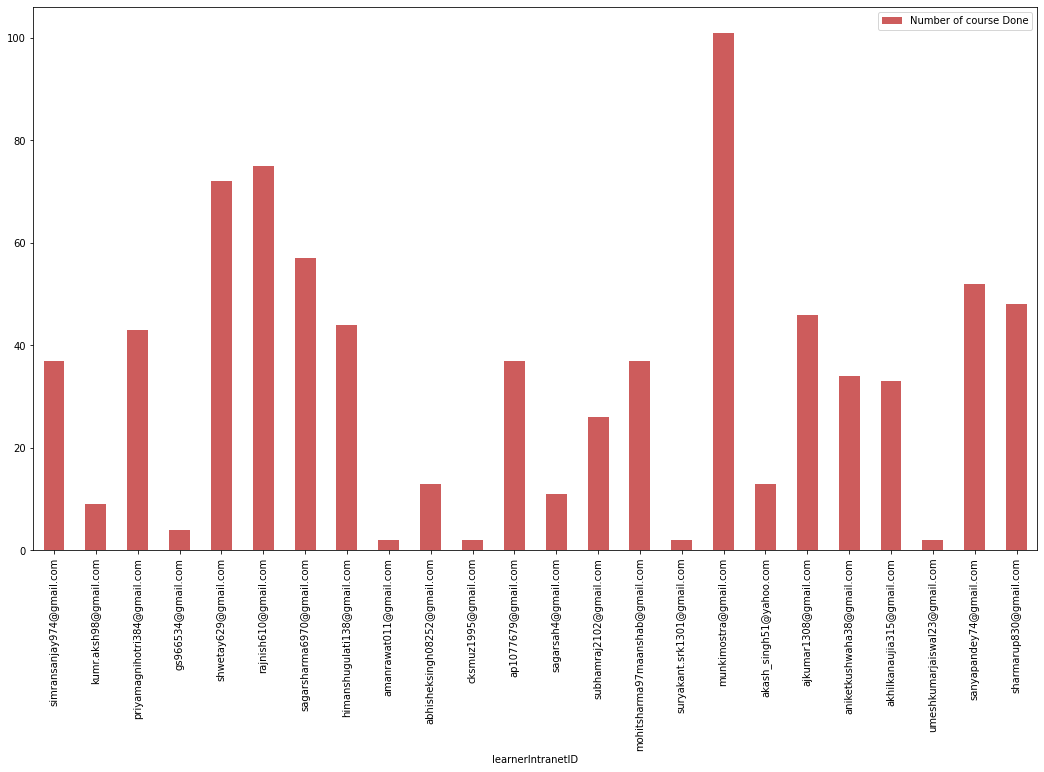

In [27]:
df_ncd.plot(kind = 'bar', x = 'learnerIntranetID', y = 'Number of course Done', figsize=(18,10), color="IndianRed")
plt.show()

##### Trainess Interest Level completing of course from March to December

In [28]:
df_sncd

,learningActivityTitle,Number of Trainees Completed above mentioned course,learnerCom
0,Why does cloud computing matter? (What is clou...,2,3/9/2020
1,CompTIA A+ 220-1001: Basic Cable Types,21,3/20/2020
2,CompTIA A+ 220-1001: Installing Hardware & Dis...,22,3/20/2020
3,Organizing Presentations Assets,1,3/20/2020
4,Using Conditional Formulas,1,3/21/2020
...,...,...,...
179,Artificial Intelligence In 5 Minutes | What Is...,1,12/28/2020
180,Cloud Computing In 6 Minutes | What Is Cloud C...,2,12/28/2020
181,How To Become An Artificial Intelligence Engin...,1,12/28/2020
182,Definition and Essential Characteristics of Cl...,1,12/28/2020


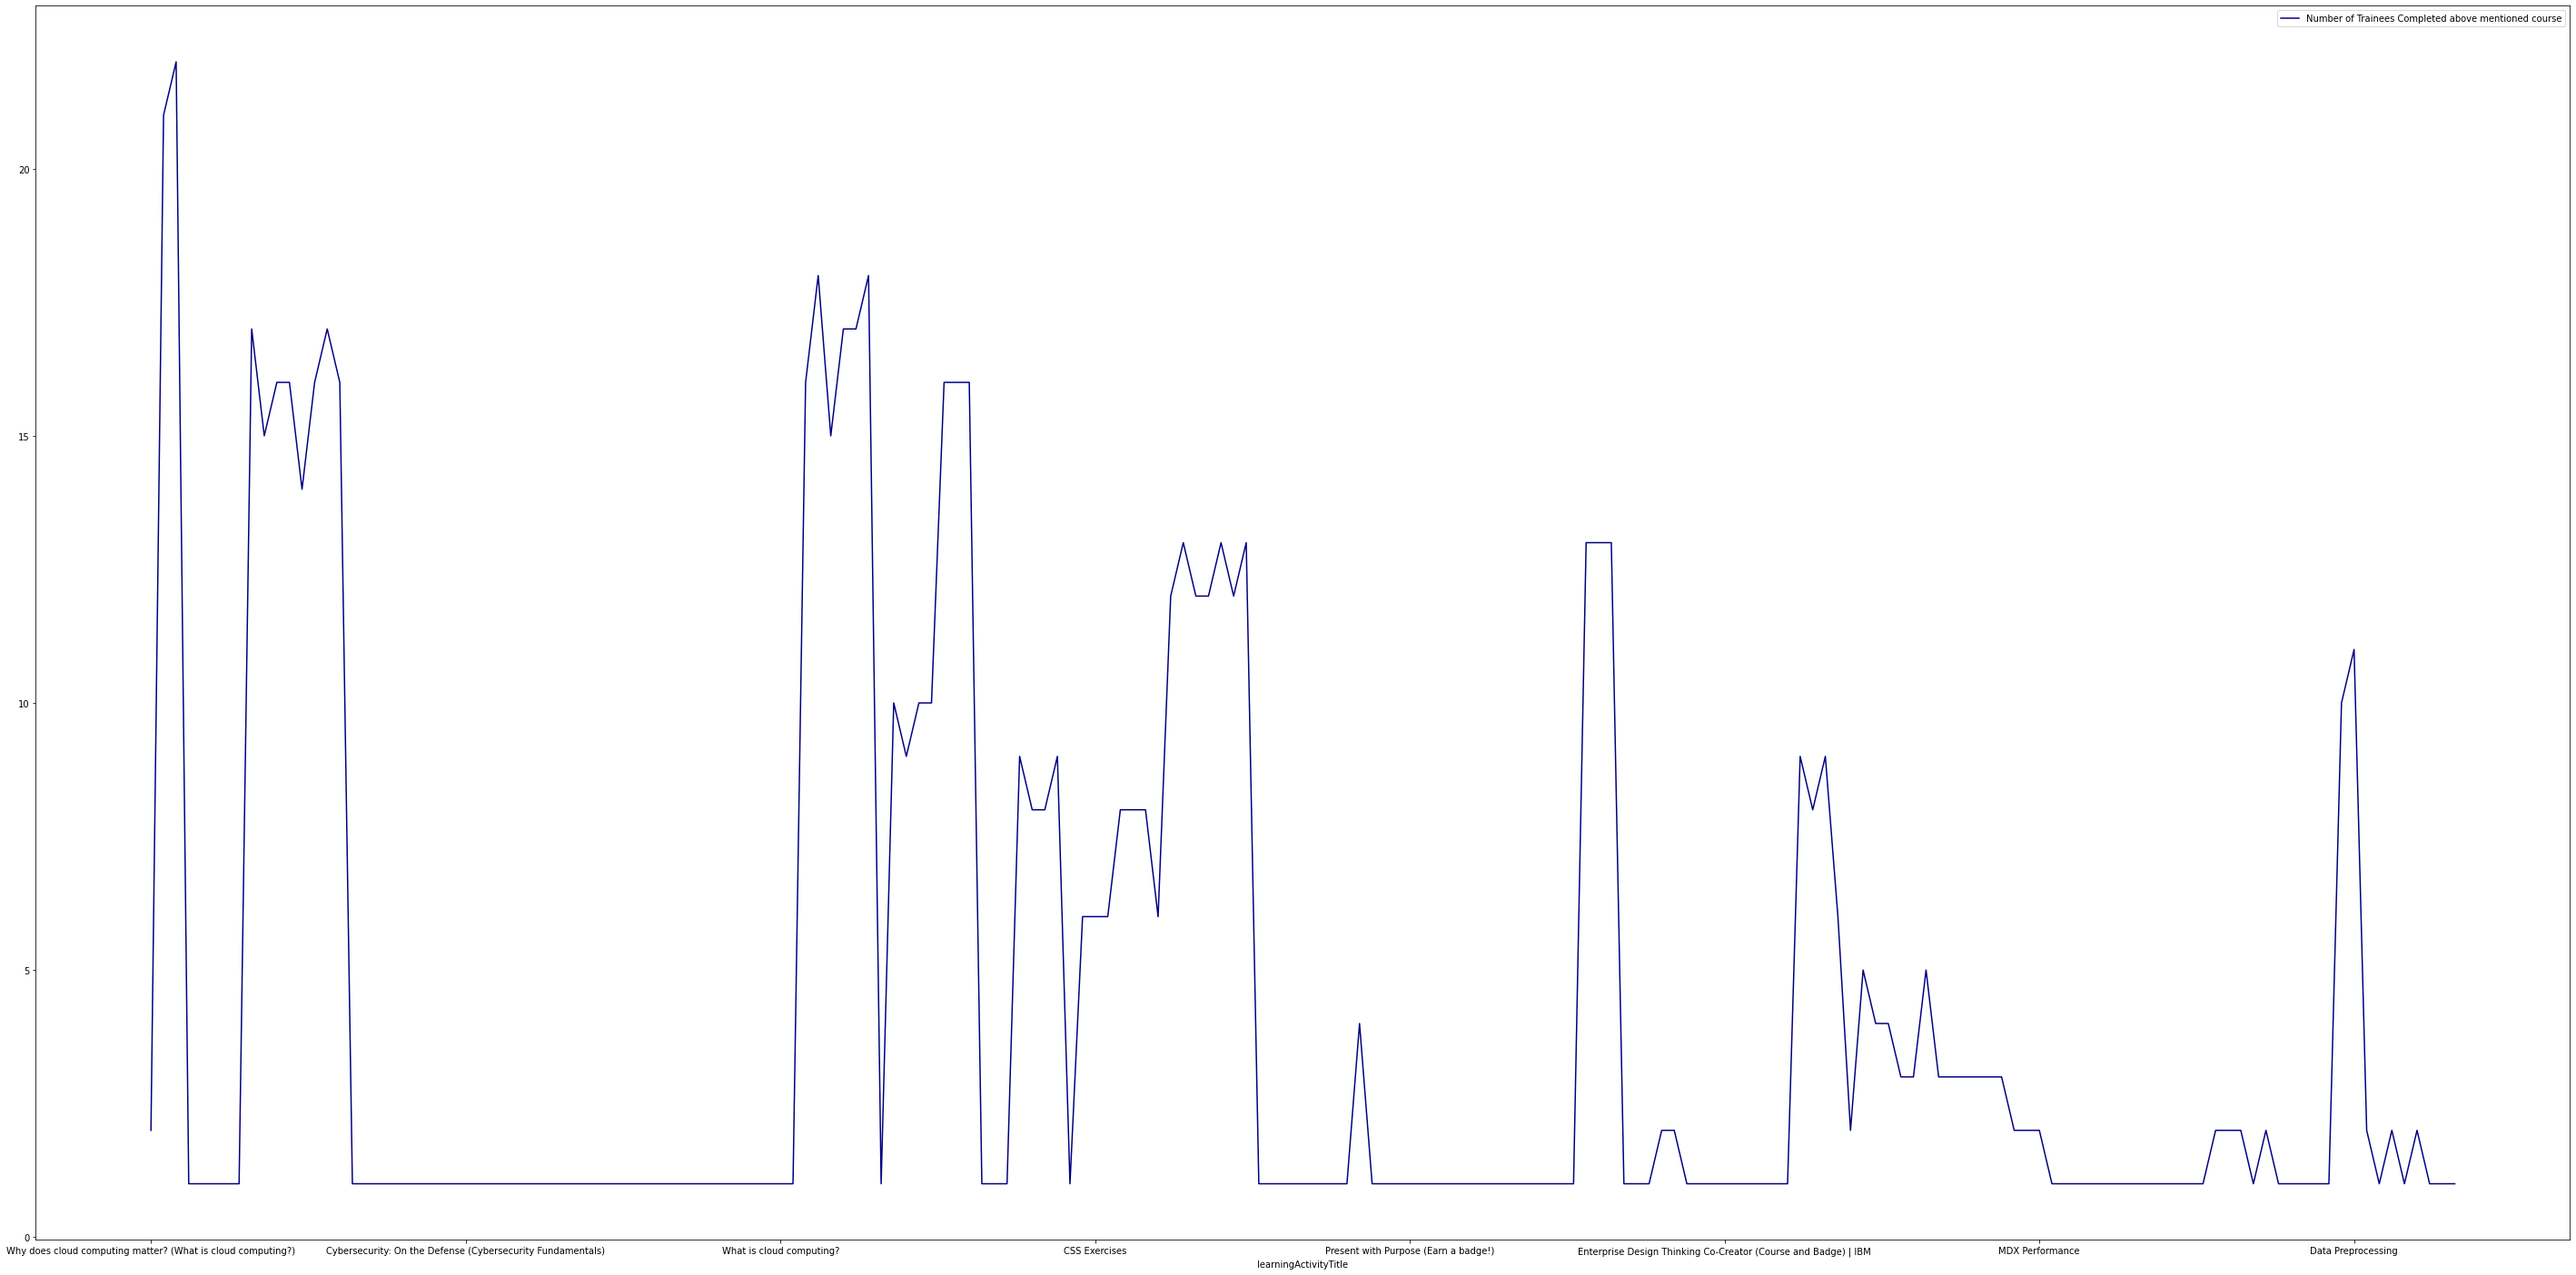

In [29]:
df_sncd.plot(kind = 'line', x = 'learningActivityTitle', y = 'Number of Trainees Completed above mentioned course', figsize=(50,25), color="navy")
plt.show()
# x = 'learningActivityTitle'
# y = 'Number of Trainees Completed above mentioned course'

##### Number of Course given on month basis

In [30]:
df_ncgmb

,Month,Number of Course given on month basis
0,March,8
1,April,50
2,May,16
3,June,0
4,July,7
5,August,0
6,September,0
7,October,0
8,November,33
9,December,70


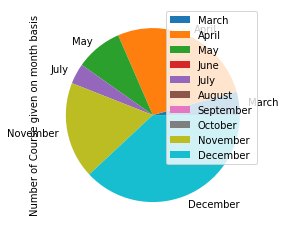

In [31]:
# df_ncgmb.plot(kind = 'pie', x = 'Number of Course given on month basis', y = labels 'Month', figsize=(18,10), color="hotpink")
# plt.show()
df_ncgmb.set_index(['Month'],inplace=True)
plot=df_ncgmb.plot.pie(y='Number of Course given on month basis')

# df_sncd.plot(kind = 'pie', y = 'Number of Trainees Completed above mentioned course')
# plt.show()

##### Total Number of Minutes spent by each trainee on SkillsBuild

In [32]:
df_nmset

,learnerIntranetID,Total Number of minutes spent by each trainee
0,abhisheksingh08252@gmail.com,306
1,ajkumar1308@gmail.com,2144
2,akash_singh51@yahoo.com,602
3,akhilkanaujia315@gmail.com,1574
4,amanrawat011@gmail.com,141
5,aniketkushwaha38@gmail.com,1414
6,ap1077679@gmail.com,1637
7,cksmuz1995@gmail.com,105
8,gs966534@gmail.com,152
9,himanshugulati138@gmail.com,2196


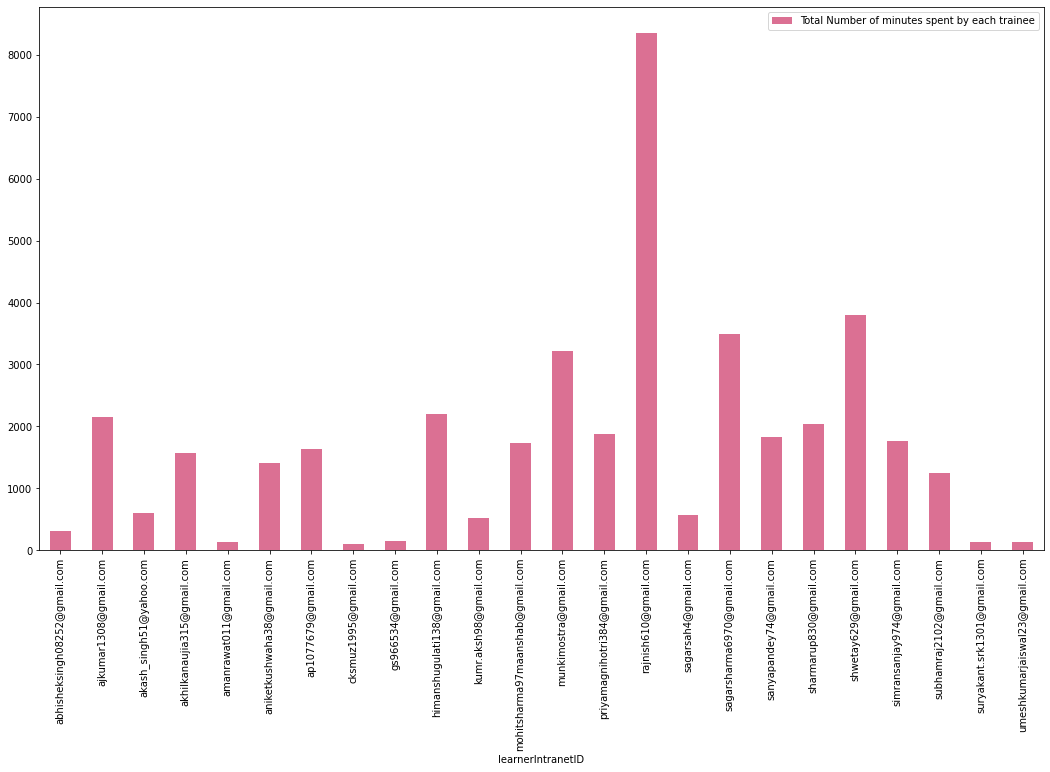

In [33]:
df_nmset.plot(kind = 'bar', x = 'learnerIntranetID', y = 'Total Number of minutes spent by each trainee', figsize=(18,10), color="PaleVioletRed")
plt.show()

##### Online Class Attendance Data

In [34]:
df_att

,Student Name,Attendance
0,PRIYAM AGNIHOTRI,132
1,SAGAR SAHU,84
2,AKHIL KANAUJIYA,152
3,MOHIT KUMAR MAAN,132
4,DEEPIKA PANDEY,127
5,SAGAR SAHARMA,132
6,UMESH KUMAR JAISAWAL,18
7,AJAY KUMAR,166
8,RAJNISH KUMAR,112
9,AKASH KUMAR,34


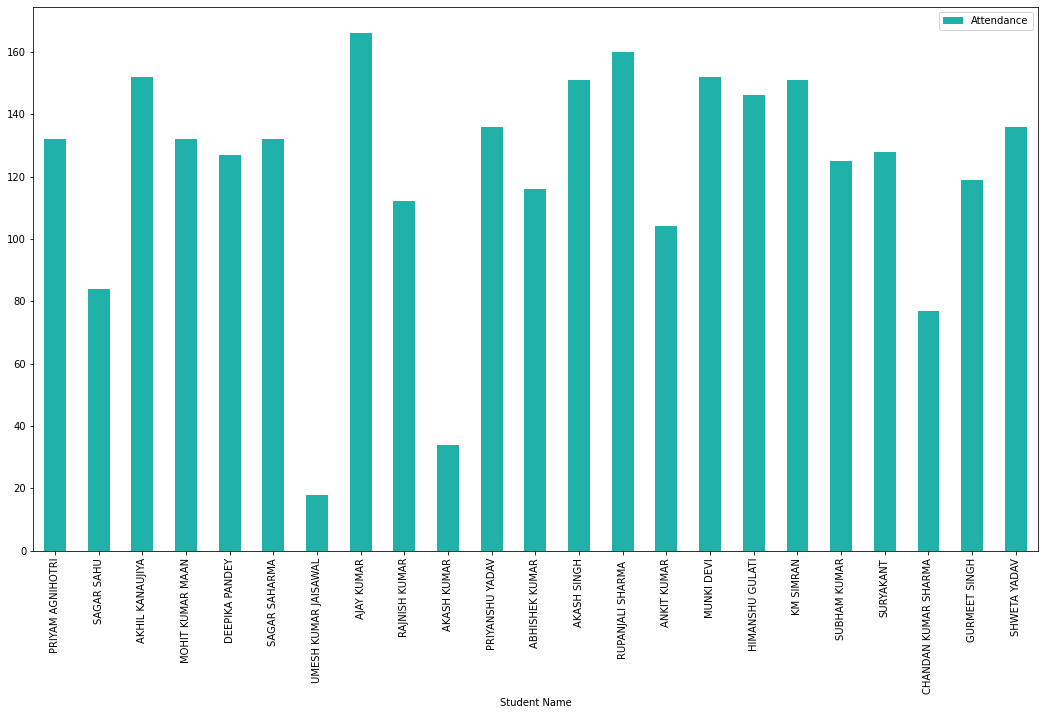

In [35]:
df_att.plot(kind = 'bar', x = 'Student Name', y = 'Attendance', figsize=(18,10), color="lightseagreen")
plt.show()